In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import division
from __future__ import print_function
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# %tensorflow_version 1.14
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy.linalg as la
import scipy.io as sio
import math
import sys
import time
import pdb
import matplotlib.pyplot as plt
import problem, network, train
import blocksparsetoolbox as bst

from scipy.linalg import toeplitz, circulant

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [2]:
np.random.seed(1)
tf.set_random_seed(1)

In [3]:
# Creating the mmv-problem: select circular matrix case 1-8

In [4]:
case = 5
n = 60
m = n
d = 15

T = np.zeros((n,n))
T[0,-1]=1
T[1:n,0:n-1]=np.eye(n-1)

if case==1:
  #1 Example: Random Circular Symmetric Matrix, where D^T@D has full rank
  a = np.random.normal(size=(m))
  D = circulant(a).astype('float32')
  D = 1/2*(D+D.T)
  D = 1/np.linalg.norm(D[:,0])*D
  for i in range(1,n):
    D[:,i]=T@D[:,i-1]

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==2:
  #2 Example: Symmetric Circular Matrix, based upon discrete function values, where D^T@D has low rank

  x = np.linspace(-1,1,n)
  a = 0.5-2*x**2
  D = circulant(a).astype('float32')
  D = 1/np.linalg.norm(D[:,0])*D

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==3:
  #3 Example: Symmetric Circular Matrix, based upon discrete function values, where D^T@D has low rank

  x = np.linspace(-1,1,n)
  a = (np.cos(1*np.pi*x))
  #a = 1/np.linalg.norm(a)*np.abs(a) #no problem
  a = 1/np.linalg.norm(a)*(a) #problem
  D = circulant(a).astype('float32')

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==4:
  #4 Example: Random Circular Matrix

  a = np.random.normal(size=(m))
  D = circulant(a).astype('float32')
  D = 1/np.linalg.norm(D[:,0])*D

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D)))
  print('rank(D@D^T)='+str(np.linalg.matrix_rank(D@D.T)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==5:
  #5 Example: Circular Matrix, based upon discrete function values,
  
  x = np.linspace(-1,1,n)
  a = (np.sin(1*np.pi*x))
  #a = 1/np.linalg.norm(a)*np.abs(a) #no problem
  a = 1/np.linalg.norm(a)*(a) #problem
  D = circulant(a).astype('float32')

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D)))
  print('rank(D@D^T)='+str(np.linalg.matrix_rank(D@D.T)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==6:
  #6 Example: Circular Matrix, based upon discrete function values,
  
  x = np.linspace(-1,1,n)
  a = (np.exp(1*np.pi*x))
  #a = 1/np.linalg.norm(a)*np.abs(a) #no problem
  a = 1/np.linalg.norm(a)*(a) #problem
  D = circulant(a).astype('float32')

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D)))
  print('rank(D@D^T)='+str(np.linalg.matrix_rank(D@D.T)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==7:
  #7 Example: Circular Matrix, not symmetric but low rank
  x = np.linspace(-1,1,n)
  a = np.cos(np.pi*x)
  a[30:n]=0
  D = circulant(a).astype('float32')
  D = 1/np.linalg.norm(D[:,0])*D

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D))) 
  print('rank(D@D^T)='+str(np.linalg.matrix_rank(D@D.T)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))
elif case==8:
  #8 Example: Circular Matrix, 
  x = np.linspace(-1,1,n)
  a = np.exp(np.pi*x)
  a[30:n]=a[0:30]
  D = circulant(a).astype('float32')
  D = 1/np.linalg.norm(D[:,0])*D

  print('rank(D^T@D)='+str(np.linalg.matrix_rank(D.T@D))) 
  print('rank(D@D^T)='+str(np.linalg.matrix_rank(D@D.T)))
  print('rank(D)='+str(np.linalg.matrix_rank(D)))
  print('coherence = '+str(np.max(np.abs(D.T@D-np.eye(m)))))

rank(D^T@D)=28
rank(D@D^T)=28
rank(D)=59
coherence = 0.9985346794128418


In [5]:
SNR = 30 # signal to noise ratio given in dB
MC = 250 # batch number
prob = problem.mmv_problem(D,L=n, B=d, MC=MC, pnz=0.1, SNR_dB=SNR)

Instructions for updating:
Use `tf.cast` instead.


Text(0.5, 1.0, 'y')

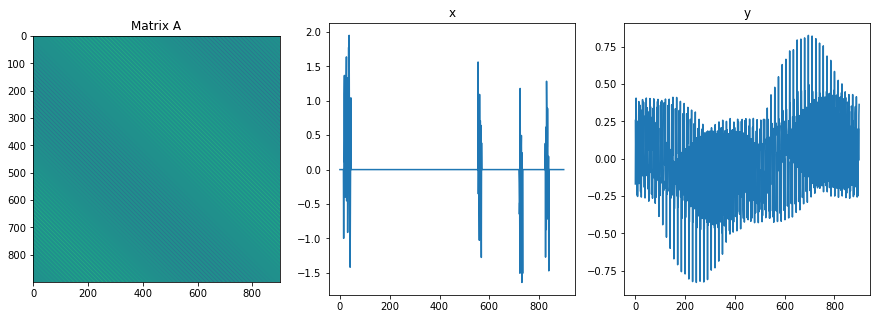

In [6]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,3)
ax[0].imshow(prob.A)
ax[0].set_title('Matrix A')
ax[1].plot(prob.xval[:,0])
ax[1].set_title('x')
ax[2].plot(prob.yval[:,0])
ax[2].set_title('y')


In [7]:
# creating the network and setup training:

T = 6 # number of layers/iterations

In [8]:
# computing the analytical weight matrix for ALBISTA and NA-ALBISTA

W = network.SolveViaFFT(prob.A_s) # if A_s represents a circular convolution we can easily compute the analytical 
                                  # weight matrix by inverting the conjugate FFT of k, where A_s=circ(k)

/Users/hauffen/Documents/Python/Block-ALISTA-main/network.py:26: RuntimeWarning: divide by zero encountered in true_divide
  k_hat=np.conj(1/s)
/Users/hauffen/Documents/Python/Block-ALISTA-main/network.py:26: RuntimeWarning: invalid value encountered in true_divide
  k_hat=np.conj(1/s)


In [10]:
layers = network.build_CircALBISTA(prob, np.kron(W,np.eye(d)), T, initial_lambda=.1, initial_gamma=1)
start = time.time()
training_stages = train.setup_training(layers,prob,trinit=1e-3)
end = time.time()
print( 'Took me {totaltime:.3f} minutes for setup training'.format(totaltime = (end-start)/60))

Took me 0.007 minutes for setup training


In [11]:
# Train!

In [12]:
sess = train.do_training(training_stages,prob,'trainings/CircALBISTA_UP_T'+str(T)+'_SNRdB_'+str(SNR)+'batch'+str(MC)+'.npz')

norms xval:150.2660275 yval:147.5758141
CircALBISTA T=1 extending lam_0_1:0,gamma_0_1:0
i=0      nmse=6.828949 dB (best=6.828949)
i=1000   nmse=-1.375066 dB (best=-1.375066)
i=2000   nmse=-1.601797 dB (best=-1.601797)
i=3000   nmse=-1.755024 dB (best=-1.755024)
i=4000   nmse=-1.964545 dB (best=-1.964545)
i=5000   nmse=-2.219408 dB (best=-2.219408)
i=6000   nmse=-2.492309 dB (best=-2.492309)
i=7000   nmse=-2.748627 dB (best=-2.748627)
i=8000   nmse=-2.960591 dB (best=-2.960591)
i=9000   nmse=-3.116820 dB (best=-3.116821)
i=10000  nmse=-3.218778 dB (best=-3.218778)
i=11000  nmse=-3.276384 dB (best=-3.276384)
i=12000  nmse=-3.302665 dB (best=-3.302665)
i=13000  nmse=-3.311690 dB (best=-3.311690)
i=14000  nmse=-3.313804 dB (best=-3.313804)
i=15000  nmse=-3.314022 dB (best=-3.314128)
i=16000  nmse=-3.314186 dB (best=-3.314187)
i=17000  nmse=-3.314195 dB (best=-3.314198)
i=18000  nmse=-3.314156 dB (best=-3.314201)
i=19000  nmse=-3.314197 dB (best=-3.314201)
i=20000  nmse=-3.314113 dB (best=-

KeyboardInterrupt: 

In [ ]:
# Evaluating

In [ ]:
y,x = prob(sess)
MC = x.shape[-1]
t=0
l2norm=np.zeros(((T),MC))
nmse_dbLISTA=np.zeros(((T),MC))
for name, xhat_, var_list in layers:
    if not name=='Linear':
        xhat = sess.run(xhat_, feed_dict={prob.y_: y, prob.x_: x})
        for i in range(0, x.shape[1]):
            nmse_dbLISTA[t,i]=bst.nmse(xhat[:,i, np.newaxis], x[:,i, np.newaxis])
            l2norm[t, i] = bst.l21norm(xhat[:, i]- x[:, i], prob.L, prob.B)
        t+=1

nmse_dbLISTAMean = 10*np.log10(np.mean(np.ma.masked_invalid(nmse_dbLISTA), axis=1))
l2normLISTAMean = np.mean(np.ma.masked_invalid(l2norm), axis=1)
l2normmax = np.max(l2norm, axis=1)

lam = np.zeros(T)
gam = np.zeros(T)
k = 1
for name, xhat_, var_list in layers:
    if not name == 'Linear':
        lam[k-1], gam[k-1] = sess.run([layers[k-1][2][0], layers[k-1][2][1]])
        k = k+1

plt.plot(nmse_dbLISTAMean)